In [1]:

%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wget

import seaborn
import numpy as np
import pandas as pd
import pylab
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as dst
import sklearn.preprocessing

from plots import intensity_heatmap


In [2]:

def read_blob_csv(url, dest):
    if not os.path.exists(dest):
        print 'downloading ', url
        filename = wget.download(url)
        os.rename(filename, dest)

    return pd.read_csv(dest)


In [3]:

# SA922
sas = '?st=2018-05-29T00%3A08%3A16Z&se=2019-05-30T00%3A08%3A00Z&sp=rl&sv=2017-07-29&sr=c&sig=F5HE2%2FqIxevyVlvS8yZuf5FG8dIpwnuW%2F2AaU3lXy8E%3D'
url = 'https://singlecelldata.blob.core.windows.net/results/SC-878/results/results/hmmcopy/A90554B_reads.csv'
dest = 'A90554B_reads.csv'
data_sa922 = read_blob_csv(url + sas, dest)


In [4]:

# SA921
sas = '?st=2018-05-29T00%3A08%3A16Z&se=2019-05-30T00%3A08%3A00Z&sp=rl&sv=2017-07-29&sr=c&sig=F5HE2%2FqIxevyVlvS8yZuf5FG8dIpwnuW%2F2AaU3lXy8E%3D'
url = 'https://singlecelldata.blob.core.windows.net/results/SC-877/results/results/hmmcopy/A90554A_reads.csv'
dest = 'A90554A_reads.csv'
data_sa921 = read_blob_csv(url + sas, dest)


In [5]:

# SA1090
sas = '?st=2018-05-29T00%3A08%3A16Z&se=2019-05-30T00%3A08%3A00Z&sp=rl&sv=2017-07-29&sr=c&sig=F5HE2%2FqIxevyVlvS8yZuf5FG8dIpwnuW%2F2AaU3lXy8E%3D'
url = 'https://singlecelldata.blob.core.windows.net/results/SC-795/results/results/hmmcopy/A96213A_reads.csv'
dest = 'A96213A_reads.csv'
data_sa1090 = read_blob_csv(url + sas, dest)


In [6]:

data_sa922['sample_id'] = data_sa922['cell_id'].apply(lambda a: a.split('-')[0])
data_sa921['sample_id'] = data_sa921['cell_id'].apply(lambda a: a.split('-')[0])
data_sa1090['sample_id'] = data_sa1090['cell_id'].apply(lambda a: a.split('-')[0])

data_sa922['external_sample_id'] = 'OV2295(R2)'
data_sa921['external_sample_id'] = 'TOV2295(R)'
data_sa1090['external_sample_id'] = 'OV2295'

cn_data = pd.concat([data_sa922, data_sa921, data_sa1090], ignore_index=True)

cn_data = cn_data[cn_data['sample_id'].isin(['SA922', 'SA921', 'SA1090'])]

cn_data['integer_copy_number'] = cn_data['state']


In [7]:

sas = '?st=2018-05-25T18%3A08%3A56Z&se=2019-05-26T18%3A08%3A00Z&sp=rl&sv=2017-07-29&sr=c&sig=AEbor5aKDlZoZak7LYlFPXjYIIX%2FbveT0awNySQ9v1I%3D'

# SA922
url = 'https://singlecelldata.blob.core.windows.net/results/SC-878/results/results/hmmcopy/A90554B_all_metrics_summary.csv'
dest = 'A90554B_metrics.csv'
metrics_sa922 = read_blob_csv(url + sas, dest)

# SA921
url = 'https://singlecelldata.blob.core.windows.net/results/SC-877/results/results/hmmcopy/A90554A_all_metrics_summary.csv'
dest = 'A90554A_metrics.csv'
metrics_sa921 = read_blob_csv(url + sas, dest)

# SA1090
url = 'https://singlecelldata.blob.core.windows.net/results/SC-795/results/results/hmmcopy/A96213A_all_metrics_summary.csv'
dest = 'A96213A_metrics.csv'
metrics_sa1090 = read_blob_csv(url + sas, dest)

metrics_sa922['sample_id'] = metrics_sa922['cell_id'].apply(lambda a: a.split('-')[0])
metrics_sa921['sample_id'] = metrics_sa921['cell_id'].apply(lambda a: a.split('-')[0])
metrics_sa1090['sample_id'] = metrics_sa1090['cell_id'].apply(lambda a: a.split('-')[0])

data_sa922['external_sample_id'] = 'OV2295(R2)'
data_sa921['external_sample_id'] = 'TOV2295(R)'
data_sa1090['external_sample_id'] = 'OV2295'


1966


,cell_id,unpaired_mapped_reads,paired_mapped_reads,unpaired_duplicate_reads,paired_duplicate_reads,unmapped_reads,percent_duplicate_reads,estimated_library_size,total_reads,total_mapped_reads,...,mad_neutral_state,breakpoints,mean_copy,state_mode,loglikehood,true_multiplier,too_even,jira_id,quality,sample_id
0,SA922-A90554B-R23-C03,393,604,0,3,338829,0.003748,60601.0,340430,1601,...,0.021077,61,2.261541,2,-611.204707,1.964997,False,SC-878,0.000,SA922
1,SA922-A90554B-R23-C05,398,1793,7,111,462902,0.057480,13877.0,466886,3984,...,0.000000,514,5.099099,4,1007.001969,4.000000,True,SC-878,0.000,SA922
2,SA922-A90554B-R23-C16,14787,761068,2692,73543,135428,0.097471,3680609.0,1672352,1536924,...,0.051489,131,4.275032,4,-5950.076400,4.961840,False,SC-878,0.658,SA922
3,SA922-A90554B-R23-C22,13409,699382,2227,61072,129954,0.088082,3768326.0,1542128,1412174,...,0.064229,105,3.967854,5,-5206.665804,4.096858,False,SC-878,0.662,SA922
4,SA922-A90554B-R23-C24,21658,1110243,4440,108243,205368,0.098549,5318193.0,2447512,2242144,...,0.029017,151,5.508476,6,-6172.309749,5.970744,False,SC-878,0.728,SA922


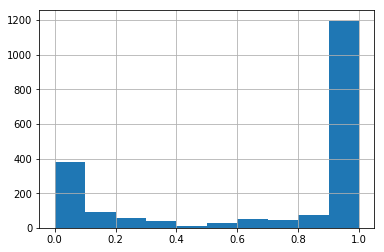

In [8]:

metrics_data = pd.concat([metrics_sa922, metrics_sa921, metrics_sa1090])
metrics_data = metrics_data[metrics_data['sample_id'].isin(['SA922', 'SA921', 'SA1090'])]
metrics_data['quality'].hist()
print len(metrics_data['cell_id'].unique())
metrics_data.head()


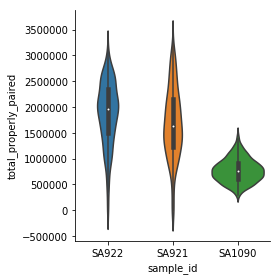

In [9]:

metrics_data2 = metrics_data[metrics_data['total_reads'] > 500000]
readcounts = metrics_data2.drop_duplicates(['cell_id', 'sample_id', 'coverage_depth'])
seaborn.factorplot(x='sample_id', y='total_properly_paired', kind='violin', data=readcounts)


1966
1542
1345


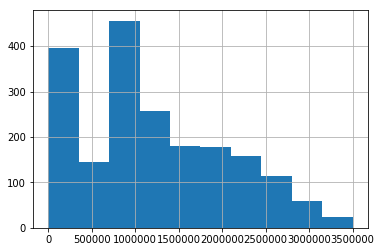

In [10]:

cn_data.groupby('cell_id')['reads'].sum().hist()

cell_read_counts = cn_data.groupby('cell_id')['reads'].sum().rename('total_reads')
cell_read_counts = cell_read_counts[cell_read_counts > 500000]

filtered_cell_ids = metrics_data[metrics_data['quality'] > 0.5][['cell_id']].drop_duplicates()

print len(cn_data['cell_id'].unique())
cn_data = cn_data.merge(cell_read_counts.reset_index())
print len(cn_data['cell_id'].unique())
cn_data = cn_data.merge(filtered_cell_ids.reset_index())
print len(cn_data['cell_id'].unique())


In [11]:

cn_data = cn_data[cn_data['gc'] > 0.]
cn_data = cn_data[cn_data['chr'] != 'Y']
cn_data = cn_data[cn_data['integer_copy_number'].notnull()]

cn_data[cn_data['integer_copy_number'].isnull()]


,chr,start,end,width,reads,gc,map,cor_gc,copy,valid,...,modal_quantile,cor_map,multiplier,state,cell_id,sample_id,external_sample_id,integer_copy_number,total_reads,index


In [12]:

cn = cn_data.set_index(['chr', 'start', 'cell_id'])['integer_copy_number'].unstack(level=2).fillna(0)


In [13]:

cn.shape


(5451, 1345)

In [14]:

import umap
from sklearn import mixture

# Experiment with number of components / dimensions
embedding = umap.UMAP().fit_transform(cn.fillna(0).values.T)

# Experiment with number of components and variance structure
mixmodel = mixture.GaussianMixture(n_components=20, covariance_type='full')
mixmodel.fit(embedding)
umap_cluster = mixmodel.predict(embedding)


Text(0,0.5,'Component 2')

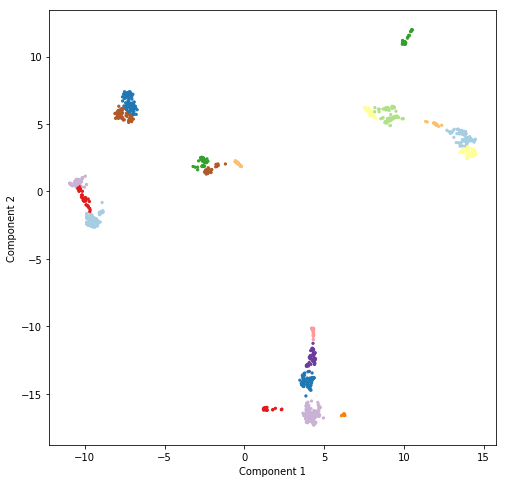

In [23]:

cn_umap_df = pd.Series(umap_cluster, index=cn.columns, name='gm_umap_cluster').reset_index()
cn_umap_df['umap1'] = embedding[:, 0]
cn_umap_df['umap2'] = embedding[:, 1]
cn_umap_df = cn_umap_df.dropna()

plt.figure(figsize=(8, 8))
plt.scatter(
    cn_umap_df['umap1'].values,
    cn_umap_df['umap2'].values,
    c=cn_umap_df['gm_umap_cluster'].values,
    cmap=plt.get_cmap("Paired"),
    s=5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')


1345
1202
881
count      9.000000
mean      97.888889
std       27.470186
min       65.000000
25%       77.000000
50%       86.000000
75%      124.000000
max      145.000000
Name: cell_id, dtype: float64


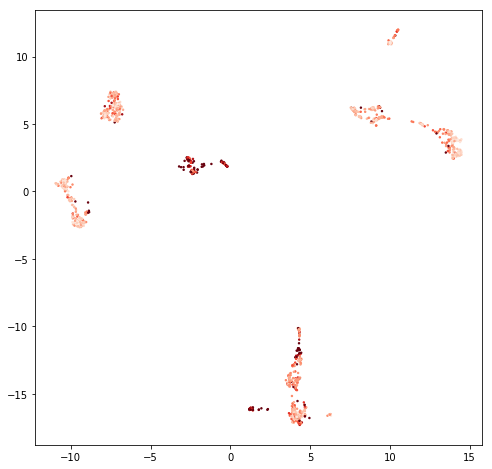

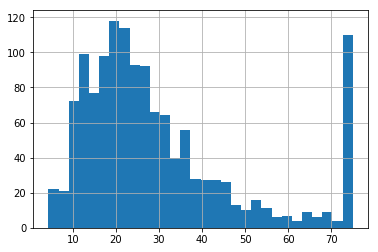

In [24]:

cn_data2 = cn_data.merge(cn_umap_df[['cell_id', 'gm_umap_cluster']].drop_duplicates(), on='cell_id')
clone_cn = (
    cn_data2.groupby(['chr', 'start', 'gm_umap_cluster'])['integer_copy_number']
    .median().rename('clone_cn').reset_index())
cn_data2 = cn_data2.merge(clone_cn)
cn_data2['clone_var'] = np.square(cn_data2['integer_copy_number'] - cn_data2['clone_cn'])
clone_std = cn_data2.groupby('cell_id')['clone_var'].sum().pow(1./2).rename('clone_std').reset_index()
clone_rms = cn_data2.groupby('cell_id')['clone_var'].mean().pow(1./2).rename('clone_rms').reset_index()

cn_umap_df = cn_umap_df.merge(clone_std)
cn_umap_df = cn_umap_df.merge(clone_rms)

cn_umap_df['clone_std'] = cn_umap_df['clone_std'].clip_upper(75.)

fig = plt.figure(figsize=(8, 8))
plt.scatter(
    cn_umap_df['umap1'].values,
    cn_umap_df['umap2'].values,
    c=cn_umap_df['clone_std'].values,
    cmap=plt.get_cmap("Reds"),
    s=2)

fig = plt.figure()
cn_umap_df['clone_std'].hist(bins=30)

# Filtering
print len(cn_umap_df['cell_id'].unique())
cn_umap_df = cn_umap_df[cn_umap_df['clone_std'] < 60.]
print len(cn_umap_df['cell_id'].unique())
clone_counts = cn_umap_df.groupby('gm_umap_cluster')['cell_id'].count()
clone_counts_filter = clone_counts[clone_counts >= 50].reset_index()
cn_umap_df = cn_umap_df.merge(clone_counts_filter[['gm_umap_cluster']])
print len(cn_umap_df['cell_id'].unique())

print cn_umap_df.groupby('gm_umap_cluster')['cell_id'].count().describe()


In [25]:

cn_data = cn_data.merge(pd.DataFrame({
    'sample_idx': range(len(cn_data['sample_id'].unique())),
    'sample_id': cn_data['sample_id'].unique()}))

cn2 = cn_data.merge(cn_umap_df[['cell_id', 'gm_umap_cluster']].drop_duplicates(), on='cell_id')
cn2 = cn2.set_index(['chr', 'start', 'cell_id', 'gm_umap_cluster', 'sample_idx'])['integer_copy_number'].unstack(level=[2,3,4]).fillna(0)
cn2 = cn2.sort_index(axis=1, level=[1, 2])


[]

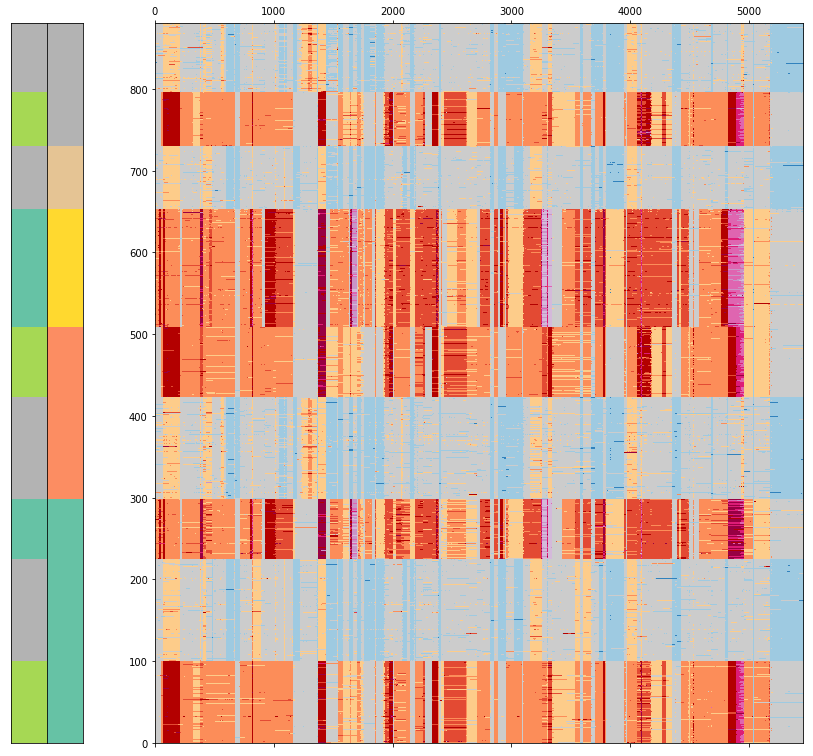

In [26]:

from matplotlib.colors import LinearSegmentedColormap

def hex_to_rgb(h):
    if h is None:
        return np.array((0, 0, 0))
    h = h.lstrip('#')
    return np.array(tuple(np.uint8(int(h[i:i+2], 16)) for i in (0, 2 ,4)))

color_reference = {0:'#3182BD', 1:'#9ECAE1', 2:'#CCCCCC', 3:'#FDCC8A', 4:'#FC8D59', 5:'#E34A33', 6:'#B30000', 7:'#980043', 8:'#DD1C77', 9:'#DF65B0', 10:'#C994C7', 11:'#D4B9DA'}
cmap = LinearSegmentedColormap.from_list('Custom', color_reference.values(), len(color_reference))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.2,0.0,0.9,1.])
ax.matshow(cn2.T.values, aspect='auto', origin='lower', cmap=cmap)

ax = fig.add_axes([0.0,0.0,0.05,1.])
ax.matshow(cn2.columns.get_level_values(2)[:, np.newaxis], aspect='auto', origin='lower', cmap=plt.get_cmap("Set2"))
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_axes([0.05,0.0,0.05,1.])
ax.matshow(cn2.columns.get_level_values(1)[:, np.newaxis], aspect='auto', origin='lower', cmap=plt.get_cmap("Set2"))
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])



[]

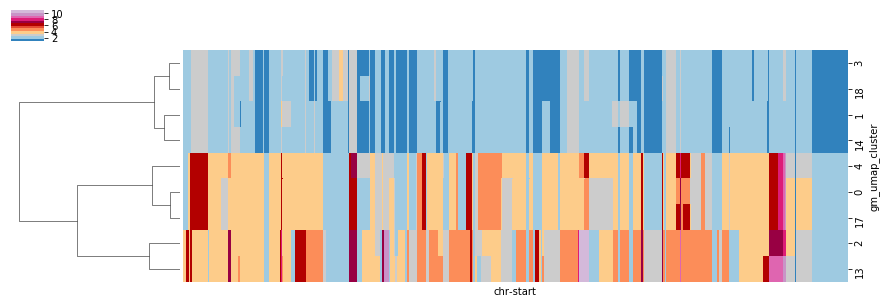

In [27]:

cn3 = np.round(cn2.T.groupby(level=1).median())

g = seaborn.clustermap(cn3, rasterized=True,
    figsize=(15, 5), cmap=cmap,
    col_cluster=False)
g.ax_heatmap.set_xticks([])


In [31]:

with pd.HDFStore('ov2295_snv_count_data.h5', 'r') as store:
    snv_count_data = store['snv_count_data']

with pd.HDFStore('ov2295_snv_data.h5', 'r') as store:
    snv_data = store['snv_data']


In [32]:

snv_data = snv_data.drop(['alt_counts', 'ref_counts'], axis=1)
snv_data = snv_data.merge(
    snv_count_data, how='outer',
    on=['chrom', 'coord', 'ref', 'alt', 'cell_id']).fillna(0)
snv_data['total_counts'] = snv_data['ref_counts'] + snv_data['alt_counts']
snv_data['sample_id'] = snv_data['cell_id'].apply(lambda a: a.split('-')[0])

assert not snv_data['coord'].isnull().any()
assert not snv_data['alt_counts'].isnull().any()

snv_data.head()


,chrom,coord,ref,alt,cell_id,mappability,strelka_score,museq_score,is_cosmic,HIGH,LOW,MODERATE,MODIFIER,tri_nucleotide_context,ref_counts,alt_counts,total_counts,sample_id
0,1,1472034,G,C,SA1090-A96213A-R20-C06,1.0,96.0,0.97,0,0.0,0.0,0.0,1.0,AGC,0.0,0.0,0.0,SA1090
1,1,1472034,G,C,SA1090-A96213A-R20-C08,1.0,96.0,0.97,0,0.0,0.0,0.0,1.0,AGC,0.0,0.0,0.0,SA1090
2,1,1472034,G,C,SA1090-A96213A-R20-C09,1.0,96.0,0.97,0,0.0,0.0,0.0,1.0,AGC,0.0,0.0,0.0,SA1090
3,1,1472034,G,C,SA1090-A96213A-R20-C10,1.0,96.0,0.97,0,0.0,0.0,0.0,1.0,AGC,0.0,0.0,0.0,SA1090
4,1,1472034,G,C,SA1090-A96213A-R20-C11,1.0,96.0,0.97,0,0.0,0.0,0.0,1.0,AGC,0.0,0.0,0.0,SA1090


In [33]:

cell_clusters = cn_umap_df[['cell_id', 'gm_umap_cluster']].drop_duplicates().rename(columns={'gm_umap_cluster': 'clone_id'})
if 'clone_id' in snv_data:
    snv_data.drop(['clone_id'], axis=1, inplace=True)
snv_data = snv_data.merge(cell_clusters)
cell_clusters['clone_id'].value_counts().rename('count').reset_index()


,index,count
0,13,145
1,1,125
2,3,124
3,0,100
4,4,86
5,18,85
6,14,77
7,2,74
8,17,65


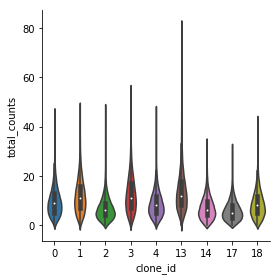

In [34]:
# Distribution of per variant total counts summed across clones

data2 = (
    snv_data.groupby(['chrom', 'coord', 'ref', 'alt', 'clone_id'])[['total_counts', 'ref_counts', 'alt_counts']]
    .sum().unstack(fill_value=0).stack().reset_index())

seaborn.factorplot(x='clone_id', y='total_counts', kind='violin', data=data2)


In [ ]:

import sys
sys.setrecursionlimit(10000)

sum_alt_counts = snv_data.groupby(['chrom', 'coord', 'ref', 'alt'])['alt_counts'].sum()
present_anywhere_filter = sum_alt_counts[sum_alt_counts > 0].reset_index().drop('alt_counts', axis=1)

data2 = snv_data.copy()
data2['sample_id'] = data2['cell_id'].apply(lambda a: a.split('-')[0])
data2 = data2.merge(cell_clusters)
data2 = (
    data2.groupby(['chrom', 'coord', 'clone_id'])[['alt_counts', 'ref_counts']]
    .sum().unstack(fill_value=0).stack().reset_index())
data2['total_counts'] = data2['ref_counts'] + data2['alt_counts']
data2['vaf'] = data2['alt_counts'] / data2['total_counts']
data2['alt_counts'] = data2['alt_counts'].clip_upper(10)
data2['is_present'] = (data2['alt_counts'] > 0) * 1
data2['is_absent'] = (data2['alt_counts'] == 0) * 1
data2['is_het'] = (data2['alt_counts'] < 0.99 * data2['total_counts']) * data2['is_present']
data2['is_hom'] = (data2['alt_counts'] >= 0.99 * data2['total_counts']) * data2['is_present']
data2['state'] = data2['is_hom'] * 3 + data2['is_het'] * 2 + data2['is_absent']
data2 = data2[data2['total_counts'] > 0]
# data2 = data2.merge(min_total_counts_filter[['chrom', 'coord', 'ref', 'alt']])
data2 = data2.merge(present_anywhere_filter[['chrom', 'coord', 'ref', 'alt']])
data2 = data2.set_index(['chrom', 'coord', 'clone_id'])['is_present'].unstack(fill_value=0)

g = seaborn.clustermap(data2, rasterized=True, figsize=(4, 12))
g.ax_heatmap.set_yticks([])


In [45]:

import scipy.cluster.hierarchy as sch
tree = sch.to_tree(g.dendrogram_col.linkage)


In [47]:
tree.right.is_leaf()


False